### Some useful routines to understand programming assignment one

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt
import matplotlib.pyplot as plt
import random
%matplotlib inline

#### The data is provided as a MATLAB binary which can be loaded into Python using the following command

In [2]:
mat = loadmat('./mnist_all.mat') 

#### The data is essentially a dictionary containing several matrices (train0-train9 are training data matrices and test0-test9 are the test data matrices)

In [3]:
mat.keys()

['test1',
 'test0',
 'test3',
 'test2',
 'test5',
 'test4',
 'test7',
 'test6',
 'test9',
 'test8',
 'train4',
 'train5',
 'train6',
 'train7',
 'train0',
 'train1',
 'train2',
 'train3',
 '__version__',
 'train8',
 'train9',
 '__header__',
 '__globals__']

#### Each matrix in the dictionary corresponds to a digit. Each row is one image (28 x 28 matrix flattened into a 784 length vector)

In [4]:
# For example train9 is all training images corresponding to the digit 9
train9 = mat.get('train9')
print train9.shape

(5949, 784)


#### To view any one digit you need to take a row and reshape it back as a matrix

/Users/chandola/anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


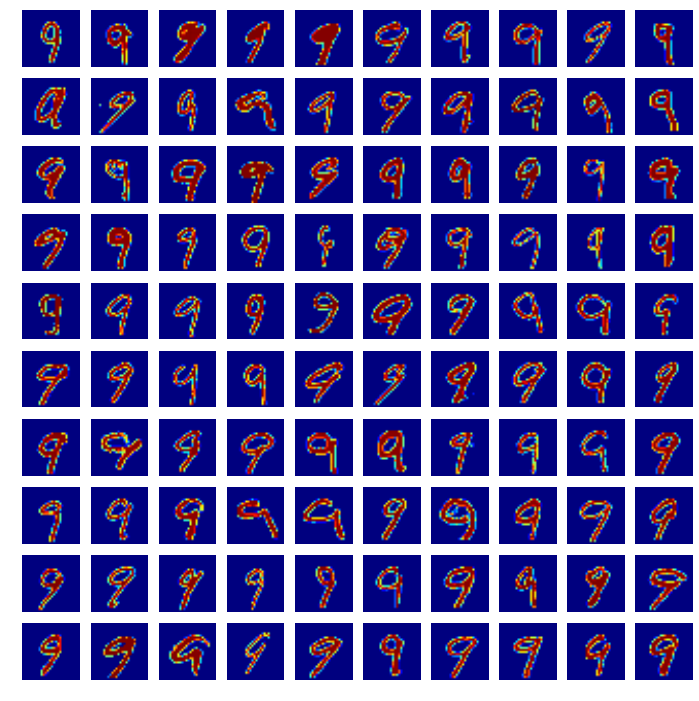

In [5]:
#plot 100 random images from the digit '9' data set
s = random.sample(range(train9.shape[0]),100)
fig = plt.figure(figsize=(12,12))
for i in range(100):
    plt.subplot(10,10,i)
    row = train9[s[i],:]
    # note that each row is a flattened image
    # we first reshape it to a 28x28 matrix
    plt.imshow(np.reshape(row,((28,28))))
    plt.axis('off')


#### Here are random 10 images for each digit

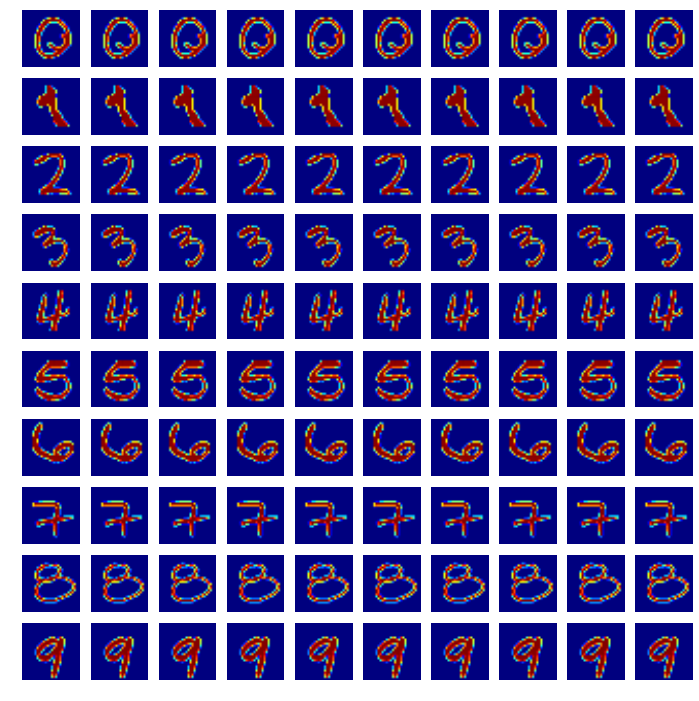

In [6]:
fig = plt.figure(figsize=(12,12))
for i in range(10):
    trainx = mat.get('train'+str(i))
    # note the use of function random.sample to extract 10 rows randomly
    s = random.sample(range(trainx.shape[0]),10)
    for j in range(10):
        plt.subplot(10,10,10*i+j+1)
        row = trainx[s[i],:]
        # note that each row is a flattened image
        # we first reshape it to a 28x28 matrix
        plt.imshow(np.reshape(row,((28,28))))
        plt.axis('off')


#### To check the total number of training examples you need to iterate over all trainx matrices

In [8]:
trainsize = 0
for i in range(10):
    m = mat.get('train'+str(i))
    trainsize = trainsize + m.shape[0]
print trainsize

60000


### Pointers about splitting a matrix into two random parts

In [10]:
# Assume we have a matrix (I will repurpose one of the trainx matrices from above)
A = mat.get('train0')
print A.shape

(5923, 784)


In [16]:
# I want to break it into two random parts, one matrix with 1000 rows and second with the rest
a = range(A.shape[0])
aperm = np.random.permutation(a)
A1 = A[aperm[0:1000],:]
A2 = A[aperm[1000:],:]
print A1.shape
print A2.shape

(1000, 784)
(4923, 784)


<i>Hint</i>: Using the same permuted (shuffled) vector aperm, you can pick out the corresponding rows from another matrix (or column vector).